# Random Forest Pipeline

In [1]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import datetime
import time
from sklearn import metrics
import os

In [2]:
#suppressing the scientific notation in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#Changing working directory
os.chdir(r'D:\Coding\projects\Palak_Paneer')
os.getcwd()

'D:\\Coding\\projects\\Palak_Paneer'

In [4]:
#loading train dataset
#For a description of titanic_2, see Manak_init_code
df_full = pd.read_csv(r"train_datasets\titanic_1.csv")
print(df_full.shape)
#df_full.head()

(891, 20)


#### Imputing missing value for Age in Train

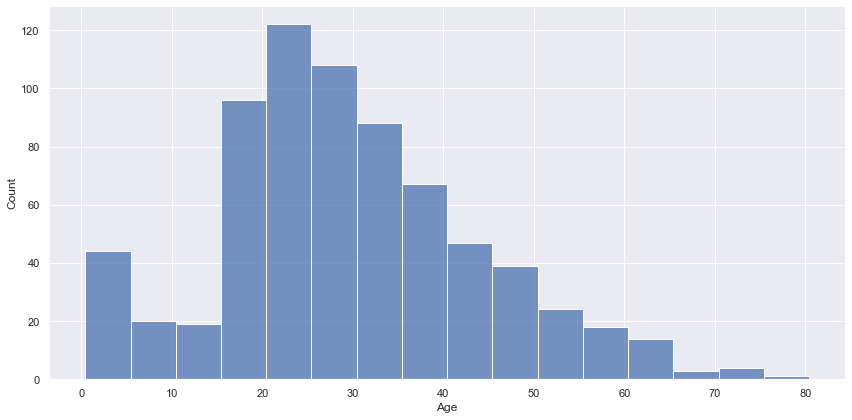

In [5]:
#imputing age with median in train dataset
#plotting fare's distribution
sns.set_theme()
sns.displot(data = df_full, x = df_full['Age'],binwidth=5, height = 6, aspect = 2)
plt.show()

In [6]:
#changing name of columns 1, 2, 3
df_full.rename(columns = {'1':'pclass_1', '2':'pclass_2', '3':'pclass_3'}, inplace =True)

In [7]:
#Calculates median age of males and females in diff pclass
print(df_full[(df_full['pclass_1'] == 1) & (df_full['male'] == 1)].Age.median())
print(df_full[(df_full['pclass_1'] == 1) & (df_full['female'] == 1)].Age.median())
print(df_full[(df_full['pclass_2'] == 1) & (df_full['male'] == 1)].Age.median())
print(df_full[(df_full['pclass_2'] == 1) & (df_full['female'] == 1)].Age.median())
print(df_full[(df_full['pclass_3'] == 1) & (df_full['male'] == 1)].Age.median())
print(df_full[(df_full['pclass_3'] == 1) & (df_full['female'] == 1)].Age.median())

40.0
35.0
30.0
28.0
25.0
21.5


In [8]:
#Calculates mean age of females and males in diff pclass
print(df_full[(df_full['pclass_1'] == 1) & (df_full['male'] == 1)].Age.mean())
print(df_full[(df_full['pclass_1'] == 1) & (df_full['female'] == 1)].Age.mean())
print(df_full[(df_full['pclass_2'] == 1) & (df_full['male'] == 1)].Age.mean())
print(df_full[(df_full['pclass_2'] == 1) & (df_full['female'] == 1)].Age.mean())
print(df_full[(df_full['pclass_3'] == 1) & (df_full['male'] == 1)].Age.mean())
print(df_full[(df_full['pclass_3'] == 1) & (df_full['female'] == 1)].Age.mean())

41.28138613861386
34.61176470588235
30.74070707070707
28.722972972972972
26.507588932806325
21.75


In [9]:
#imputing empty age values with median age values for d/f groups
df_full.Age.fillna(0,inplace=True)
df_full.loc[(df_full['Age']==0) & (df_full['male']==1) & (df_full['pclass_1'] == 1), 'Age'] = 40
df_full.loc[(df_full['Age']==0) & (df_full['female']==1) & (df_full['pclass_1'] == 1), 'Age'] = 35
df_full.loc[(df_full['Age']==0) & (df_full['male']==1) & (df_full['pclass_2'] == 1), 'Age'] = 30
df_full.loc[(df_full['Age']==0) & (df_full['female']==1) & (df_full['pclass_2'] == 1), 'Age'] = 28
df_full.loc[(df_full['Age']==0) & (df_full['male']==1) & (df_full['pclass_3'] == 1), 'Age'] = 25
df_full.loc[(df_full['Age']==0) & (df_full['female']==1) & (df_full['pclass_3'] == 1), 'Age'] = 21.5

In [10]:
#QC
#fill rates
fill_rate = {}
null_count = (df_full['Age'].isna().sum())
frate = 100-(null_count/len(df_full))*100
fill_rate['Age']=frate
print(frate)
#pass

#checking df for correctness
print(df_full[df_full['Age']==0].shape)
#pass

#previously, index ==10 was empty for age, checking the index now
pd.DataFrame(df_full.iloc[5]).transpose()
#pass - median age of male in pclass3 is 25

#checking for index 22
pd.DataFrame(df_full.iloc[17]).transpose()
#pass - expected age of male in pclass 2 is 30

100.0
(0, 20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.00,0,0,244373,13.00,S,0,0,1,0,0,1,0,1,0


#### Imputing missing value for embarked in train

In [11]:
#since most people embarked from Southampton, we will impute the two missing values in training using Southampton
df_full.Embarked.fillna('Tatti',inplace=True)
df_full.loc[(df_full['Embarked']=='Tatti'), 'S'] = 1
df_full.loc[(df_full['Embarked']=='Tatti'), 'Embarked'] = 'S'

In [12]:
#QC
#fill rates
fill_rate = {}
null_count = (df_full['Embarked'].isna().sum())
frate = 100-(null_count/len(df_full))*100
fill_rate['Embarked']=frate
print(frate)
#pass

#checking df for correctness
print(df_full[df_full['Age']==0].shape)
#pass

#previously, index 61 was empty for age, checking the index now
pd.DataFrame(df_full.iloc[61]).transpose()
#pass

100.0
(0, 20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,S,0,1,0,0,0,1,1,0,0


In [13]:
#QC
#checking for index 829
pd.DataFrame(df_full.iloc[829]).transpose()
#pass 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,S,0,1,0,0,0,1,1,0,0


In [14]:
#saving the full dataset for train - has all dummies, has all columns
#df_full.to_csv(r'train_datasets/train_clean_full.csv', index = False)

#### Applying random forest

In [15]:
#breaking down into X and y arrays, removing categorical vars - these vars(except Name) have already been made into booleans: train
X = df_full.drop(['Survived','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
#X.head()

(891, 14)
(891, 1)


In [16]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)

In [17]:
#random forest - main
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

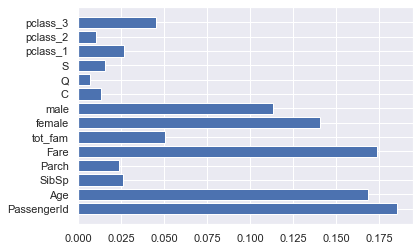

In [18]:
#feature importance
plt.barh(X_train.columns, clf.feature_importances_)
plt.show()

In [19]:
#prediction y for dev data 
y_pred_dev=clf.predict(X_dev)

In [20]:
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [21]:
confusion_matrix = (metrics.confusion_matrix(y_dev, y_pred_dev, labels=[0,1]))
print(confusion_matrix)

[[49  7]
 [ 6 28]]


In [22]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred_dev)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred_dev)
print('precision is: '+ str(precision_dev))
sensitivity_dev = metrics.recall_score(y_dev, y_pred_dev)
print('sensitivity is: '+ str(sensitivity_dev))
f1_score_dev = metrics.f1_score(y_dev, y_pred_dev)
print('f1_score is: '+ str(f1_score_dev))

accuracy is: 0.8555555555555555
precision is: 0.8
sensitivity is: 0.8235294117647058
f1_score is: 0.8115942028985507


## Test pipeline-predicts and creates submission csv

### Step 1: Make the test dataset like train datasets in terms of columns

In [23]:
#loading test dataset
df_full_test = pd.read_csv(r"test_datasets/test.csv")
print(df_full_test.shape)
df_full_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [24]:
#Creating tot_fam and removing Cabin column
X_test = df_full_test.drop(['Cabin'], axis = 1)
X_test['tot_fam'] = X_test['SibSp'] + X_test['Parch']
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S,2


In [25]:
dummy_sex = pd.get_dummies(X_test['Sex'])
X_test = pd.concat([X_test, dummy_sex], axis=1)

In [26]:
dummy_embark = pd.get_dummies(X_test['Embarked'])
X_test = pd.concat([X_test, dummy_embark], axis=1)
#X_test.head()

In [27]:
dummy_pclass = pd.get_dummies(X_test['Pclass'])
X_test = pd.concat([X_test, dummy_pclass], axis=1)
#X_test.head()

In [28]:
X_test = X_test.drop(['Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
print(X_test.shape)
#X_test.head()

(418, 14)


In [29]:
X_test.rename(columns={1:'pclass_1', 2:'pclass_2', 3:'pclass_3'}, inplace=True)

In [30]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')
Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')


#### Complete: the column names of train and test datasets are now the same

### Step 2: Filling the missing values in test dataset 

In [31]:
#calculates fill rate for columns in test dataset
fill_rate = {}
for i in X_test:
    null_count = (X_test[i].isna().sum())
    frate = 100-(null_count/len(X_test))*100
    fill_rate[i]=frate

#converts fill rate from dictionary to a dataframe
fillrate_df = pd.DataFrame((fill_rate.items()), columns = ['column_name', 'fill_rate'])
fillrate_df

,column_name,fill_rate
0,PassengerId,100.00
1,Age,79.43
2,SibSp,100.00
3,Parch,100.00
4,Fare,99.76
5,tot_fam,100.00
6,female,100.00
7,male,100.00
8,C,100.00
9,Q,100.00


#### Imputing missing values for Age

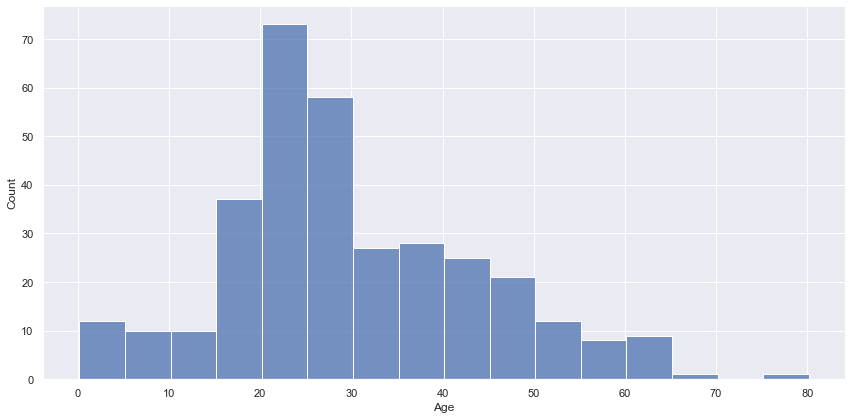

In [32]:
#plotting fare's distribution
sns.set_theme()
sns.displot(data = X_test, x = X_test['Age'],binwidth=5, height = 6, aspect = 2)
plt.show()

In [33]:
#Calculates median age of males and females in diff pclass in test
print(X_test[(X_test['pclass_1'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['pclass_1'] == 1) & (X_test['female'] == 1)].Age.median())
print(X_test[(X_test['pclass_2'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['pclass_2'] == 1) & (X_test['female'] == 1)].Age.median())
print(X_test[(X_test['pclass_3'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['pclass_3'] == 1) & (X_test['female'] == 1)].Age.median())

42.0
41.0
28.0
24.0
24.0
22.0


In [34]:
#computing mean values of age in test
print(X_test[(X_test['pclass_1'] == 1) & (X_test['male'] == 1)].Age.mean())
print(X_test[(X_test['pclass_1'] == 1) & (X_test['female'] == 1)].Age.mean())
print(X_test[(X_test['pclass_2'] == 1) & (X_test['male'] == 1)].Age.mean())
print(X_test[(X_test['pclass_2'] == 1) & (X_test['female'] == 1)].Age.mean())
print(X_test[(X_test['pclass_3'] == 1) & (X_test['male'] == 1)].Age.mean())
print(X_test[(X_test['pclass_3'] == 1) & (X_test['female'] == 1)].Age.mean())

40.52
41.333333333333336
30.940677966101696
24.376551724137933
24.525104166666665
23.073400000000003


In [35]:
#imputing empty age values with median age values for d/f groups - these values are from train, not from test
X_test.Age.fillna(0,inplace=True)
X_test.loc[(X_test['Age']==0) & (X_test['male']==1) & (X_test['pclass_1'] == 1), 'Age'] = 40
X_test.loc[(X_test['Age']==0) & (X_test['female']==1) & (X_test['pclass_1'] == 1), 'Age'] = 35
X_test.loc[(X_test['Age']==0) & (X_test['male']==1) & (X_test['pclass_2'] == 1), 'Age'] = 30
X_test.loc[(X_test['Age']==0) & (X_test['female']==1) & (X_test['pclass_2'] == 1), 'Age'] = 28
X_test.loc[(X_test['Age']==0) & (X_test['male']==1) & (X_test['pclass_3'] == 1), 'Age'] = 25
X_test.loc[(X_test['Age']==0) & (X_test['female']==1) & (X_test['pclass_3'] == 1), 'Age'] = 21.5

In [36]:
#QC
#fill rates
fill_rate = {}
null_count = (X_test['Age'].isna().sum())
frate = 100-(null_count/len(X_test))*100
fill_rate[i]=frate
print(frate)
#pass

#checking df for correctness
print(X_test[X_test['Age']==0].shape)
#pass

#previously, index ==10 was empty for age, checking the index now
pd.DataFrame(X_test.iloc[10]).transpose()
#pass - median age of male in pclass3 is 25

100.0
(0, 14)


,PassengerId,Age,SibSp,Parch,Fare,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
10,902.00,25.00,0.00,0.00,7.90,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [37]:
#QC
#checking for index 22
pd.DataFrame(X_test.iloc[22]).transpose()
#pass - expected age of female in pclass 1 is 35

,PassengerId,Age,SibSp,Parch,Fare,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
22,914.00,35.00,0.00,0.00,31.68,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


#### Imputing missing values for fare

In [38]:
#calculating median fare for d/f pclass
print(df_full[(df_full['pclass_1']==1)].Fare.median())
print(df_full[(df_full['pclass_2']==1)].Fare.median())
print(df_full[(df_full['pclass_3']==1)].Fare.median())

60.287499999999994
14.25
8.05


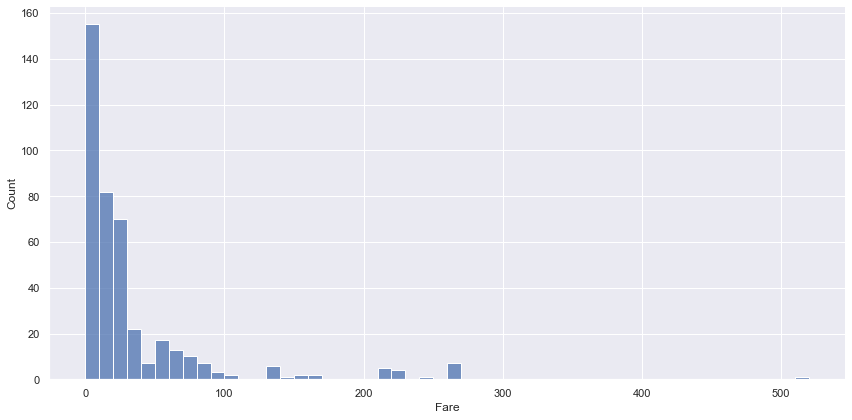

In [39]:
#plotting fare's distribution
sns.set_theme()
sns.displot(data = X_test, x = X_test['Fare'],binwidth=10, height = 6, aspect = 2)
plt.show()

In [40]:
#calculating mean fare for comparison
print(df_full[(df_full['pclass_1']==1)].Fare.mean())
print(df_full[(df_full['pclass_2']==1)].Fare.mean())
print(df_full[(df_full['pclass_3']==1)].Fare.mean())

84.15468749999992
20.66218315217391
13.675550101832997


In [41]:
#imputing missing values in fare column
X_test.Fare.fillna(1000000000, inplace = True)
X_test.loc[(X_test['Fare'] == 1000000000)&(X_test['pclass_1']==1), 'Fare'] = 60.28
X_test.loc[(X_test['Fare'] == 1000000000)&(X_test['pclass_2']==1), 'Fare'] = 14.25
X_test.loc[(X_test['Fare'] == 1000000000)&(X_test['pclass_3']==1), 'Fare'] = 8.05

In [42]:
X_test.dtypes

PassengerId      int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
tot_fam          int64
female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
pclass_1         uint8
pclass_2         uint8
pclass_3         uint8
dtype: object

In [43]:
#QC
#fill rates
fill_rate = {}
null_count = (X_test['Fare'].isna().sum())
frate = 100-(null_count/len(X_test))*100
fill_rate[i]=frate
print(frate)
#pass

#checking df for correctness
print(X_test[X_test['Fare']==1000000000].shape)
#pass

#previously, index ==10 was empty for age, checking the index now
pd.DataFrame(X_test.iloc[152]).transpose()
#pass - median fare of pclass3 is 8.05

100.0
(0, 14)


,PassengerId,Age,SibSp,Parch,Fare,tot_fam,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
152,1044.00,60.50,0.00,0.00,8.05,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


### Step 3: Predicting on the amended test dataset and preparing the file for submission

In [44]:
#prediction y for dev data 
y_pred_test=clf.predict(X_test)

In [45]:
#matching the shapes of X_test and y_pred_test
print(y_pred_test.shape)
print(X_test.shape)

(418,)
(418, 14)


In [46]:
#subsetting only the Passenger Id column for final submission 
X_concat = X_test[['PassengerId']]
X_concat.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [47]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
print(csv_submission.shape)
csv_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [48]:
#saving csv with a unique timestamp
timestamp = str(datetime.datetime.now().strftime('%Y%m%d%H%M%S'))
timestamp
csv_submission.to_csv(r'submission\csv_submission' + timestamp + '.csv', index =False)

### Gridsearch

In [49]:
#grid search for hyper parameter tuning
#rfc=RandomForestClassifier(random_state=42)
#param_grid = { 
#    'n_estimators': [200, 500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [4,5,6,7,8],
#    'criterion' :['gini', 'entropy']
#}
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)